# Descomposición Wavelet discreta y continua

<img src="https://raw.githubusercontent.com/fhernanb/fhernanb.github.io/master/my_docs/logo_unal_color.png" alt="drawing" width="200"/>

En este documento se muestran ejemplos sencillos de cómo se hace una descomposición Wavelet de una señal y cómo se reconstruye la señal a partir de la descomposición.

Lo primero es instalar el paquete [PyWavelets](https://pywavelets.readthedocs.io/en/latest/).

In [1]:
pip install PyWavelets

Las funciones que vamos a usar son:

- Para transformación Wavelet discreta
  - De un nivel: dwt(data, wavelet) <----> idwt(cA, cD, wavelet, mode).
  - Multinivel: wavedec(data, wavelet, level) <----> waverec(coeffs, wavelet, mode='symmetric').

- Para transformación wavelet continua
  - cwt(data, scales, wavelet).



In [2]:
import pywt
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

## 1. Ejemplo de descomposición Wavelet continua

En este ejemplo se va a crear una señal

In [3]:
# 1. Generación de señal de ejemplo
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 1000, endpoint=False)
frecuencia = np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 20 * t)
senal = frecuencia * np.exp(-(t-0.5)**2/(0.1)**2)  # Señal modulada con Gauss

# 2. Descomposición con Wavelet Continua (CWT)
escalas = np.arange(1, 5)
print("Las escalas son:", escalas)
wavelet = 'cmor1.5-1.0'
coeficientes, freqs = pywt.cwt(data=senal, scales=escalas, wavelet=wavelet)

Las escalas son: [1 2 3 4]


In [4]:
print("Los coeficientes son:", coeficientes)
print("Las frecuencias son:", freqs)

Los coeficientes son: [[ 3.06695568e-14-1.22571045e-13j  3.65509679e-14-3.66137704e-13j
   1.90668380e-14-5.41745406e-13j ... -1.60832333e-14-7.50569017e-13j
  -1.55352197e-14-6.48443904e-13j -1.90882330e-14-5.41745406e-13j]
 [-7.95311119e-15+1.42248069e-13j -9.72033557e-15-1.39043409e-13j
   1.73472849e-14+9.12040665e-14j ... -5.23273559e-15+1.24279716e-14j
   1.25390578e-14-4.06545027e-14j -1.74189723e-14+9.12040665e-14j]
 [-1.05127110e-13+1.53098584e-13j -1.28622710e-13-1.95525400e-13j
   1.68690841e-13-9.25455450e-14j ...  6.46092034e-14-1.09466678e-13j
   1.86180287e-14+5.90636375e-14j -1.68315017e-13-9.17244005e-14j]
 [-1.97780162e-13+2.25317791e-13j -2.42291207e-13-1.70220867e-13j
   1.29551242e-13-2.33013327e-13j ...  5.01681186e-14+1.56781126e-13j
  -2.01255246e-13+8.66019267e-14j -1.29534557e-13-2.33013327e-13j]]
Las frecuencias son: [1.         0.5        0.33333333 0.25      ]


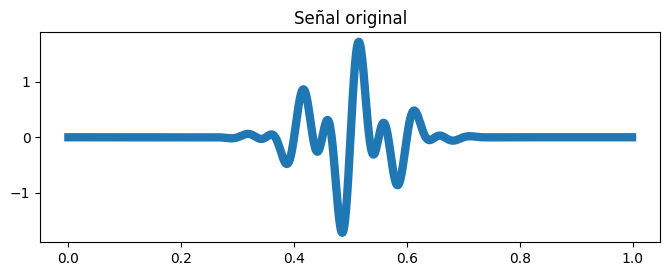

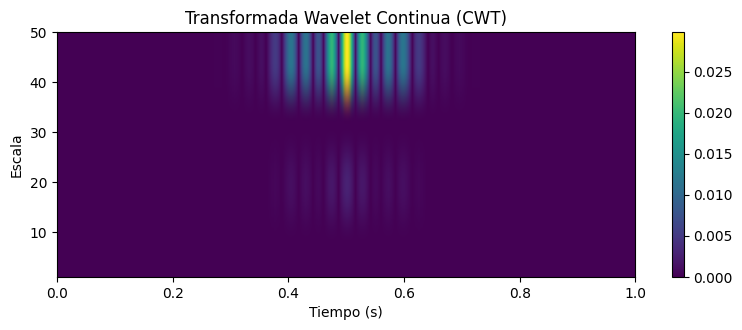

In [5]:
# Graficar señal original y CWT
plt.figure(figsize=(8, 6))
plt.subplot(211)
plt.plot(t, senal, linewidth=6)
plt.title('Señal original')

plt.figure(figsize=(8, 6))
plt.subplot(212)
plt.imshow(np.abs(coeficientes), extent=[0, 1, 1, 50],
           cmap='viridis', aspect='auto')
plt.ylabel('Escala')
plt.xlabel('Tiempo (s)')
plt.title('Transformada Wavelet Continua (CWT)')
plt.colorbar()
plt.tight_layout()
plt.show()

In [6]:
# Es posible almacenar toda la transformación en un solo objeto
descomposicion = pywt.cwt(senal, escalas, wavelet)
descomposicion

(array([[ 3.06695568e-14-1.22571045e-13j,  3.65509679e-14-3.66137704e-13j,
          1.90668380e-14-5.41745406e-13j, ...,
         -1.60832333e-14-7.50569017e-13j, -1.55352197e-14-6.48443904e-13j,
         -1.90882330e-14-5.41745406e-13j],
        [-7.95311119e-15+1.42248069e-13j, -9.72033557e-15-1.39043409e-13j,
          1.73472849e-14+9.12040665e-14j, ...,
         -5.23273559e-15+1.24279716e-14j,  1.25390578e-14-4.06545027e-14j,
         -1.74189723e-14+9.12040665e-14j],
        [-1.05127110e-13+1.53098584e-13j, -1.28622710e-13-1.95525400e-13j,
          1.68690841e-13-9.25455450e-14j, ...,
          6.46092034e-14-1.09466678e-13j,  1.86180287e-14+5.90636375e-14j,
         -1.68315017e-13-9.17244005e-14j],
        [-1.97780162e-13+2.25317791e-13j, -2.42291207e-13-1.70220867e-13j,
          1.29551242e-13-2.33013327e-13j, ...,
          5.01681186e-14+1.56781126e-13j, -2.01255246e-13+8.66019267e-14j,
         -1.29534557e-13-2.33013327e-13j]]),
 array([1.        , 0.5       , 0.3333

# 2. Ejemplo descomposición discreta 1 nivel

Señal original: [3, -1, 1, 0, -9, 15, 2, 6, 1, 0, 2, -1, 0, 1, 0, 1]

Coeficientes aproximación (cA): [1.41 0.71 4.24 5.66 0.71 0.71 0.71 0.71]
Coeficientes detalle (cD): [  2.83   0.71 -16.97  -2.83   0.71   2.12  -0.71  -0.71]

Señal reconstruida: [ 3. -1.  1.  0. -9. 15.  2.  6.  1.  0.  2. -1.  0.  1.  0.  1.]




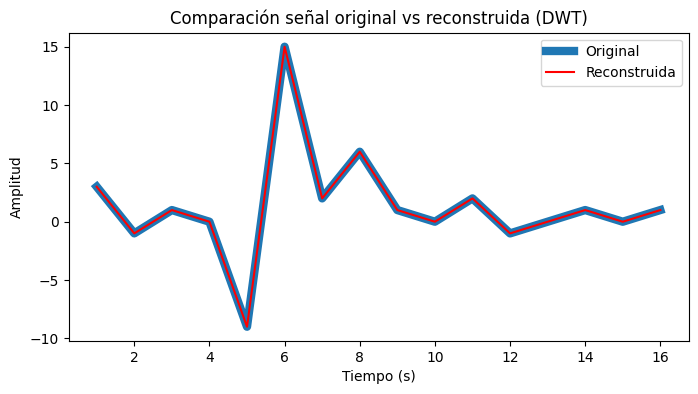

In [7]:
import numpy as np
import pywt

# 1. Señal original
senal = [3, -1, 1, 0, -9, 15, 2, 6, 1, 0, 2, -1, 0, 1, 0, 1]
t = np.linspace(start=1, stop=len(senal), num=len(senal))

print("Señal original:", senal)

# 2. Aplicar DWT (1 nivel) con wavelet Haar (db1)
wavelet = 'db1'
cA, cD = pywt.dwt(senal, wavelet)

print("\nCoeficientes aproximación (cA):", np.round(cA, 2))
print("Coeficientes detalle (cD):", np.round(cD, 2))

# 3. Reconstrucción con IDWT
senal_reconstruida = pywt.idwt(cA, cD, wavelet, mode='symmetric')
print("\nSeñal reconstruida:", np.round(senal_reconstruida, 2))
print("\n")

# 4. Graficar comparación
plt.figure(figsize=(8, 4))
plt.plot(t, senal, linewidth=6,
         label='Original')
plt.plot(t, senal_reconstruida[:len(t)],
         color='red', label='Reconstruida')
plt.title('Comparación señal original vs reconstruida (DWT)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

# 3. Ejemplo descomposición discreta multinivel

Señal original: [3, -1, 1, 0, -9, 15, 2, 6, 1, 0, 2, -1, 0, 1, 0, 1]

Coeficientes de descomposición:
Nivel 0: [1.5 7.  1.  1. ]
Nivel 1: [ 0.5 -1.   0.   0. ]
Nivel 2: [  2.83   0.71 -16.97  -2.83   0.71   2.12  -0.71  -0.71]

Señal reconstruida: [ 3. -1.  1.  0. -9. 15.  2.  6.  1.  0.  2. -1.  0.  1.  0.  1.]




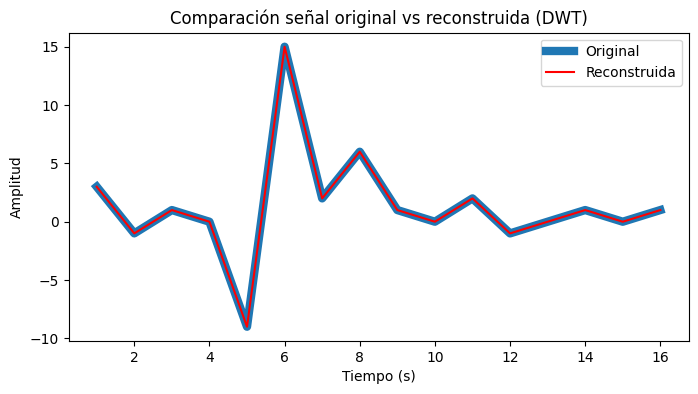

In [8]:
import numpy as np
import pywt

# 1. Señal original
senal = [3, -1, 1, 0, -9, 15, 2, 6, 1, 0, 2, -1, 0, 1, 0, 1]
t = np.linspace(start=1, stop=len(senal), num=len(senal))

print("Señal original:", senal)

# 2. Descomposición multinivel con wavedec
wavelet = 'db1'
coeffs = pywt.wavedec(senal, wavelet, level=2)
print("\nCoeficientes de descomposición:")
for i, coeff in enumerate(coeffs):
    print(f"Nivel {i}: {np.round(coeff, 2)}")

# 3. Reconstrucción con waverec
senal_reconstruida = pywt.waverec(coeffs, wavelet)
print("\nSeñal reconstruida:", np.round(senal_reconstruida, 2))
print("\n")

# 4. Graficar comparación
plt.figure(figsize=(8, 4))
plt.plot(t, senal, linewidth=6,
         label='Original')
plt.plot(t, senal_reconstruida[:len(t)],
         color='red', label='Reconstruida')
plt.title('Comparación señal original vs reconstruida (DWT)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()


# 4. Ejemplo

/usr/local/lib/python3.11/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should follow the format cmorB-C, where B and C are floats representing the bandwidth frequency and center frequency, respectively (example, for backward compatibility: cmor = cmor1.0-0.5).
  wavelet = DiscreteContinuousWavelet(wavelet)


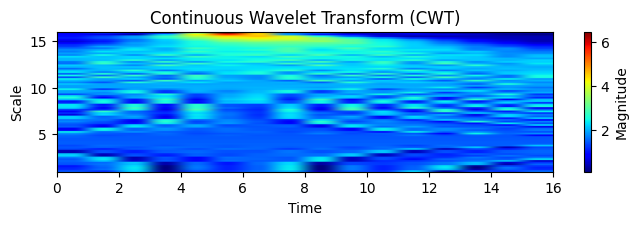

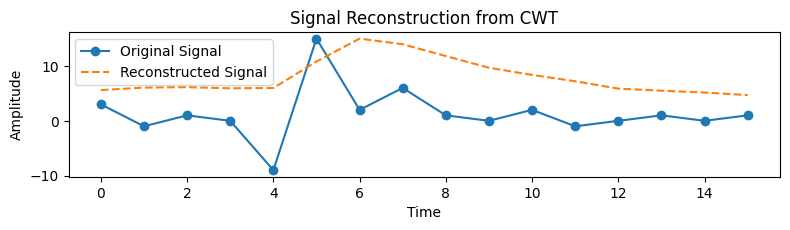

In [9]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Define the signal
signal = np.array([3, -1, 1, 0, -9, 15, 2, 6, 1, 0, 2, -1, 0, 1, 0, 1])

# Define scales and wavelet
scales = np.arange(1, 83)
wavelet = 'cmor'

# Apply CWT
coefficients, frequencies = pywt.cwt(signal, scales, wavelet)

# Reconstruct the signal using an inverse transform approximation
reconstructed_signal = np.sum(coefficients.real * (1 / np.sqrt(scales))[:, np.newaxis], axis=0)

# Normalize reconstruction
reconstructed_signal *= np.max(signal) / np.max(reconstructed_signal)

# Plot the CWT scalogram
plt.figure(figsize=(8, 4))
plt.subplot(211)
plt.imshow(np.abs(coefficients), aspect='auto', extent=[0, len(signal), 1, 16], cmap='jet')
plt.colorbar(label='Magnitude')
plt.ylabel('Scale')
plt.xlabel('Time')
plt.title('Continuous Wavelet Transform (CWT)')

# Plot original and reconstructed signals
plt.figure(figsize=(8, 4))
plt.subplot(212)
plt.plot(signal, label='Original Signal', marker='o')
plt.plot(reconstructed_signal, label='Reconstructed Signal', linestyle='dashed')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal Reconstruction from CWT')

plt.tight_layout()
plt.show()

